In [1]:
%load_ext autoreload
%autoreload 2

import pyattimo
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

In [2]:
# load a dataset, any list of numpy array of floats works fine
# The following call loads the first 100000 points of the ECG 
# dataset (which will be downloaded from the internet)
ts = pyattimo.load_dataset('ecg')
series = ts.flatten()
ds_name = "ECG"

print("Size of DS: ", series.shape)

Size of DS:  (7824879,)


In [3]:
# Now we can find k-motiflets:
#  - w is the window length
#  - repetitions is the number of LSH repetitions
start = time.time()

max_k = 10
m_iter = pyattimo.MotifletsIterator(
    ts, w=1000, max_k=max_k
)

for m in m_iter:
    print(m.indices)    
    print(m.extent)
    # np.sort(m.indices)
    
end = time.time()
print("Discovered "+str(max_k)+" motiflets in", end - start, "seconds")    

[6779113, 7013193, 7168573, 7379261]
0.5143984620823309
[7109645, 7207985, 7377669]
0.4323316750604617
[7137172, 7414112]
0.3013261953047597
[6687111, 7071963, 7121175, 7131543, 7408319, 7502795, 7541907]
0.6446619659263795
[4532107, 7207995, 7377679, 7383111, 7501211, 7801803]
0.630615603778781
[6687164, 7072016, 7121228, 7408372, 7541960]
0.5816067083358128
[6779092, 7013172, 7018800, 7168552, 7226772, 7309472, 7314432, 7379240]
0.727413766728954
[6705787, 6753503, 6988483, 7094339, 7221183, 7465719, 7518967, 7575415, 7629183, 7673739]
0.7847788871869649
[6705696, 6753412, 6919384, 7094248, 7221092, 7465628, 7518876, 7575324, 7629092]
0.7540062772075722
[1183362, 6662666, 6705710, 6753426, 6988406, 7094262, 7221106, 7465642, 7518890, 7629106, 7816638]
0.8084174917375606
Discovered 10 motiflets in 17.97506308555603 seconds


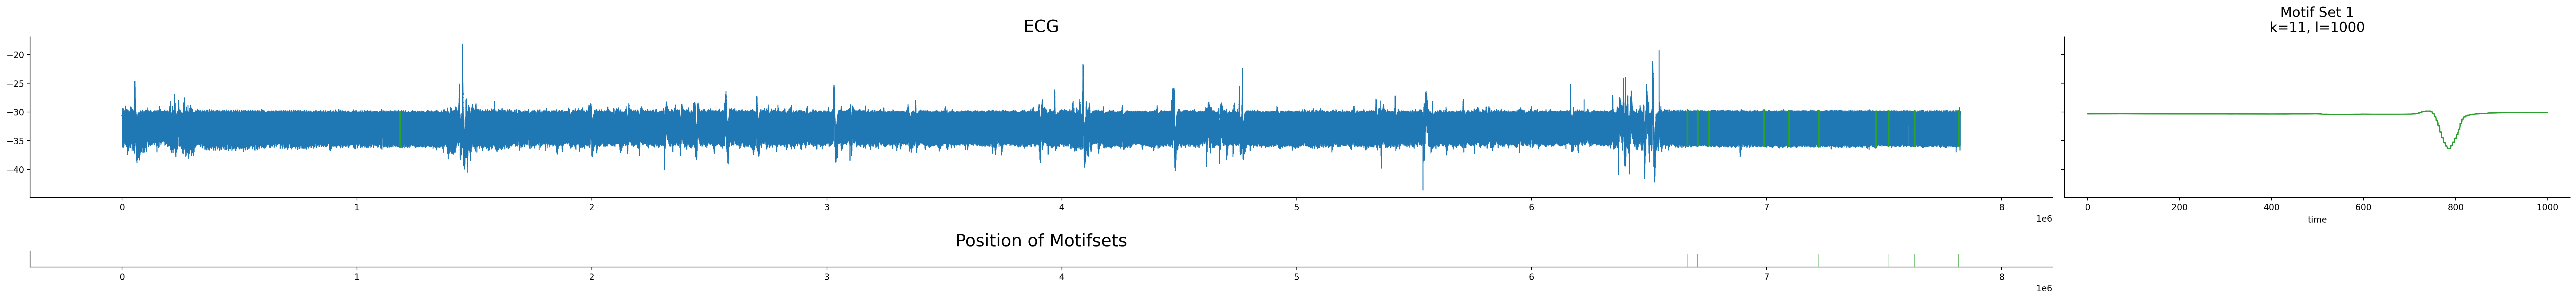

(<Figure size 4200x500 with 3 Axes>,
 array([[<Axes: title={'center': 'ECG'}>,
         <Axes: title={'center': 'Motif Set 1\nk=11, l=1000'}, xlabel='time', ylabel='value'>],
        [<Axes: title={'center': 'Position of Motifsets'}>, <Axes: >]],
       dtype=object))

In [24]:
motifs = [[1183362, 6662666, 6705710, 6753426, 6988406, 7094262, 7221106, 7465642, 7518890, 7629106, 7816638]]

plot_motifsets(
    ds_name,
    series,
    motifsets=motifs,
    motif_length=1000)

Data 7824879
Chosen window-size: motiflet: [1183362, 6662666, 6705710, 6753426, 6988406, 7094262, 7221106, 7465642, 7518890, 7629106, 7816638] extent=0.8084174917375606 in 22.3 s
Elbow Points [7]


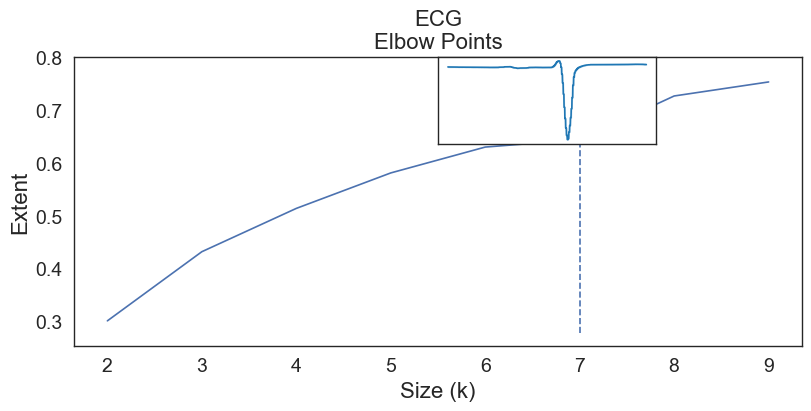

/Users/bzcschae/workspace/motiflets_paper/motiflets/plotting.py:895: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)
/Users/bzcschae/workspace/motiflets_paper/motiflets/plotting.py:895: UserWarning: The figure layout has changed to tight
  gs.tight_layout(fig)
/Users/bzcschae/workspace/motiflets_paper/motiflets/plotting.py:896: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.show()


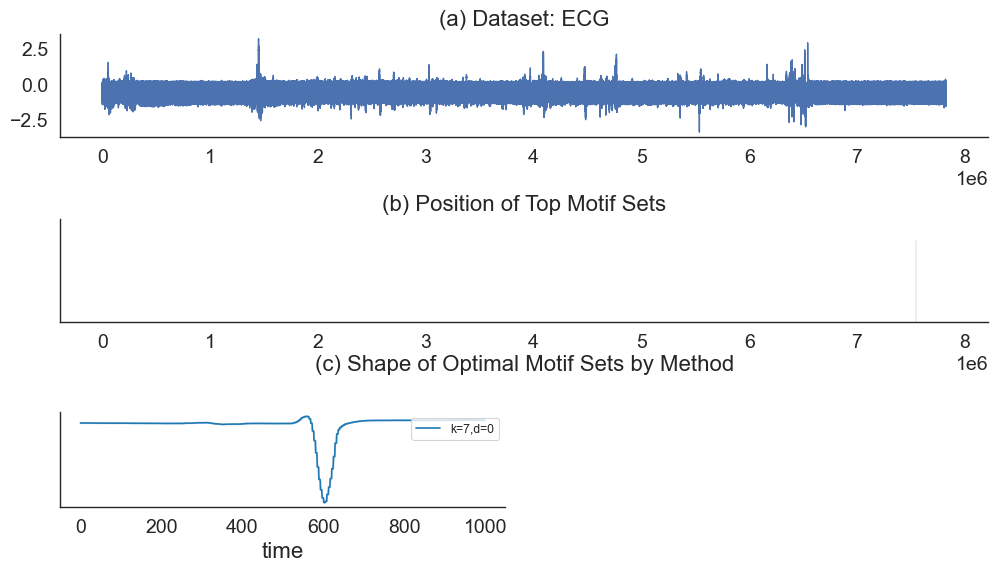

In [36]:
k=10
mot = Motiflets("ECG", series)
_ = mot.fit_k_elbow(k, 1000)

In [ ]:
print(np.sort(mot.motiflets[-1]))
print(mot.dists[-1])

In [4]:
D_full, knns = ml.compute_distance_matrix(series.to_numpy(), 1000, 1)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
print(D_full.shape)
dim_index = np.zeros((D_full.shape[1], 1), dtype=np.int32)

(1, 29001, 29001)


In [9]:
pos = np.sort(m.indices)
print(pos)

ml.get_pairwise_extent(D_full, pos, dim_index)**2


[  481  1445  3909  5073  6385 10245 12605 16273 17501 18797 20221 21621
 22929 24421 27245 28635]


4.258178561202897